In [32]:
library(tidyverse)

In [35]:
# input parameters
input_folder = "all_germline_ci5_cs1e9"
filename = "plotdata_unique_tumor_all_germline_singletons_excluded_tumor_4_cs_filtered.txt"

# output parameters
output_folder = "union_germline_ci4_cs1e9"
plot_title = "Unique tumor kmers"


paramspace <- read.csv("../data/metadata/paramspace_phaseI.csv", sep = ",")
dim(paramspace)
#output_path_unique_kmers, pt_id

[1] 15  8

In [36]:
data_all <- NULL

for (row in 1:nrow(paramspace)){
    pt = paramspace[row, "pt_id"]
    fd = paramspace[row, "output_path_unique_kmers"]
    
    data <- read.table(paste("../data/", pt, "/", fd ,"/", input_folder, "/", filename, sep = ""))
    data <- data %>% mutate(patient_id = pt)
    
    cum_sum <- NULL
    for (row in 1:nrow(data)){
        if (row <= 1000){
            sub_data <- data[row:nrow(data), ]
            cum_sum <- c(cum_sum, sum(sub_data$V2))
        } else {
            cum_sum <- c(cum_sum, NA)
        }
        }

    data <- data %>% mutate(cumulative_kmers = cum_sum)
    
    data_all <- rbind(data_all, data)
    }



In [37]:
dim(data_all)

colnames(data_all) <- c("count", "n", "patient_id", "cumulative_kmers")
head(data_all)

[1] 8019    4

count,n,patient_id,cumulative_kmers
5,1141837,C04689,4096465
6,906194,C04689,2954628
7,496132,C04689,2048434
8,353732,C04689,1552302
9,250293,C04689,1198570
10,185716,C04689,948277


In [38]:
data_all_1000 <- data_all %>% filter(count <= 1000)
data_all_1000$label <- NA
data_all_1000$label[which(data_all_1000$count == max(data_all_1000$count))] <- data_all_1000$patient_id[which(data_all_1000$count == max(data_all_1000$count))]


In [39]:
#data_only_500[1, "patient_id"]
data_only_250 <- data_all_1000 %>% filter(count == 250)
data_only_250
log(max(data_only_250$n))

count,n,patient_id,cumulative_kmers,label
250,5,C04689,387,NA
250,16,C04816,1520,NA
250,2,C04837,483,NA
250,4,C04849,619,NA
250,1,C04874,282,NA
250,2,C04886,257,NA
250,1,C04887,204,NA
250,19,C05048,1831,NA
250,1,C05073,472,NA
250,2,C05118,347,NA


[1] 2.944439

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


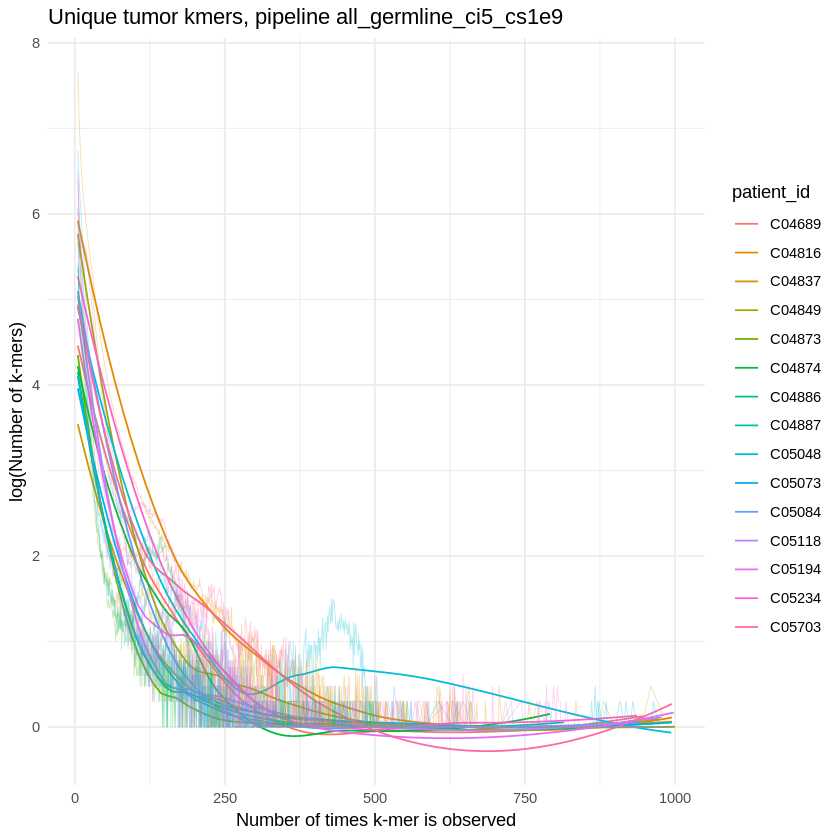

In [42]:


line_smooth <- ggplot(data_all_1000) + geom_smooth(aes(count, log10(n), color = patient_id), size = 0.5, alpha = 1, se = FALSE) + 
    geom_line(aes(count, log10(n), color = patient_id), size = 0.25, alpha = 0.3) + 
    xlab("Number of times k-mer is observed") + 
    ylab("log(Number of k-mers)") + 
    theme_minimal()  + 
    #annotate("text", x = 250, y = log10(max(data_only_250$n)) + 0.6, label = data_only_250$patient_id[which(data_only_250$n == max(data_only_250$n))]) +
    ggtitle(paste(plot_title, ", pipeline ", input_folder, sep =  ""))

line_smooth



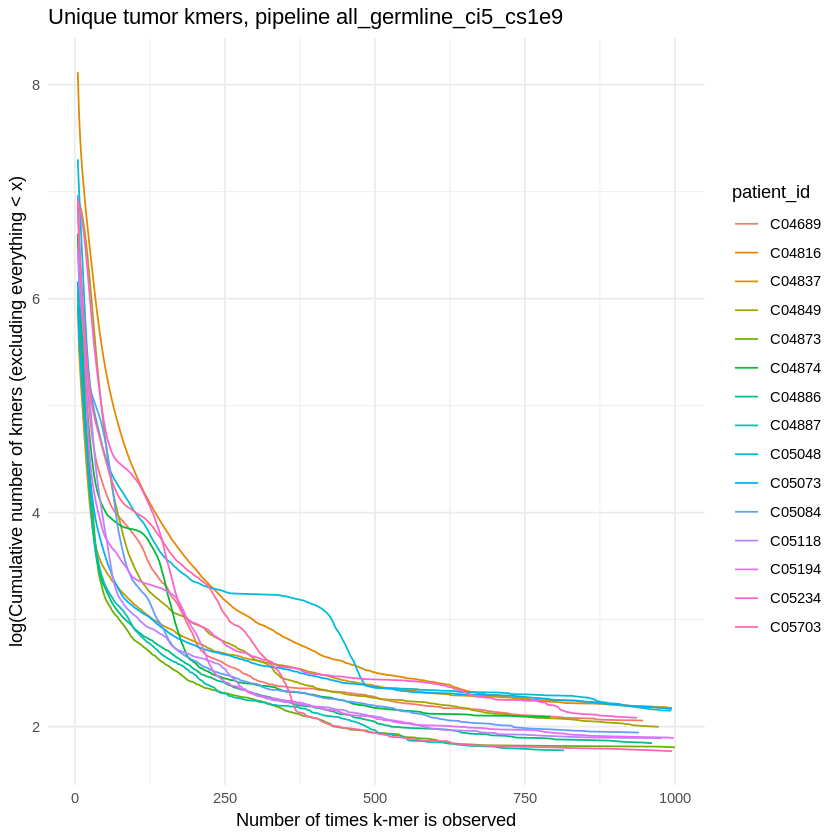

In [43]:
line_cumulative <- ggplot(data_all_1000) + 
    #geom_smooth(aes(count, log10(cumulative_kmers), color = patient_id), size = 0.5, alpha = 1, se = FALSE) + 
    geom_line(aes(count, log10(cumulative_kmers), color = patient_id), size = 0.5, alpha = 1) + 
    xlab("Number of times k-mer is observed") + 
    ylab("log(Cumulative number of kmers (excluding everything < x)") + 
    theme_minimal()  + 
    #annotate("text", x = 250, y = log10(max(data_only_250$cumulative_kmers)) + 0.6, label = data_only_250$patient_id[which(data_only_250$n == max(data_only_250$n))]) +
    ggtitle(paste(plot_title, ", pipeline ", input_folder, sep =  ""))

line_cumulative

In [44]:
ggsave(
  paste("../plotting_results/", output_folder, "/kmer_distributions/PhaseI_samples__kmer_count_distribution", ".png", sep = ""),
  line_smooth, dpi = "print")

ggsave(
  paste("../plotting_results/", output_folder, "/kmer_distributions/PhaseI_samples__kmer_count_distribution_cumulative", ".png", sep = ""),
  line_cumulative, dpi = "print")

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Saving 6.67 x 6.67 in image
